
# WaterTAP Parameter Sweep Tool

<!-- <img src="assets_parameter_sweep_demo/watertap-logo.png" alt="NAWI logo" width="200" align="right"/> -->




# Outline

This demo will briefly describe and demonstrate how the parameter sweep tool in WaterTAP can be used for various technoeconomic analyses.

1. Introduction to parameter sweep
2. Software demonstration
3. Advanced features

## Introduction

* **Parameter sweep** is a tool for performing optimization, sensitivity analyses, and uncertainty quantification.
* Experiments are run repeatedly with a different set of input parameters to see their effects on the output quantities of interest. 
* **Output metrics** can include levelized cost of water (LCOW), component cost, specific energy consumption, energy efficiency, water recovery rate, gained output ratio, and bulk temperature difference among others. 
* **Input parameters** are technology dependent, some of which include feed water salinity, membrane permeability, membrane area, pumping efficiency, thermal conductivity, operating temperature, number of stages, labor, and capital expenditure.



## Main Features of the Parameter Sweep Tool

* **Modular** : It can work with any pyomo model, i.e., any WaterTAP flowsheet.
* **Scalable** : Analyses can be run in parallel on a personal computer, HPC, or cloud. Uses HDF5 for output storage.
* **Flexible** : Can be customized and combined to create complex analysis worflows.

## Types of Parameter Sweeps

* In its current form, a user can run 3 types of parameter sweeps
    - **Simple parameter sweep**
    - Recursive parameter sweep
    - Differential parameter sweep
* Samples for the parameter sweep can be generated from a probability distribution or an *n*-dimensional euclidean space where *n* is the number of parameters in the sweep. Latin hypercube sampling is also enabled.

### Simple Parameter Sweep

![ParameterSweep](assets_parameter_sweep_demo/Parameter_Sweep_Flowchart.png)
*Generate samples from a distribution or a Euclidean space and solve flowsheets with those input values.*

## Primary requirements for running a parameter sweep

* Function to construct the Pyomo model of the flowsheet
* Function to create the sweep parameters
* Initialization and optimization functions (reinitialization function deprecated)
* Parallel computing information
* Output file information

## Test Flowsheet

* We use a simple **RO system with an energy recovery device** to demonstrate the capabilities of the parameter sweep tool. 
* It comprises a high pressure pump connected to a steady state zero-dimensional RO process model. A turbine-type isothermal energy recovery device model is connected downstream of the RO model.
* The feed water is an NaCl solution and is modeled using an property package within WaterTAP. 
* Outputs that can be measured from this flow sheet include LCOW, product flow rate and concentration, volumetric recovery, water recovery, and specific energy consumption.



<div>
    <img src="graphics/RO_with_ERD.png" alt="RO with energy recovery device" width="800px"/>
</div>

/var/folders/gs/9r53xcnx4kjbgntt31vsh4mjz570mg/T/ipykernel_19587/752004203.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper left")


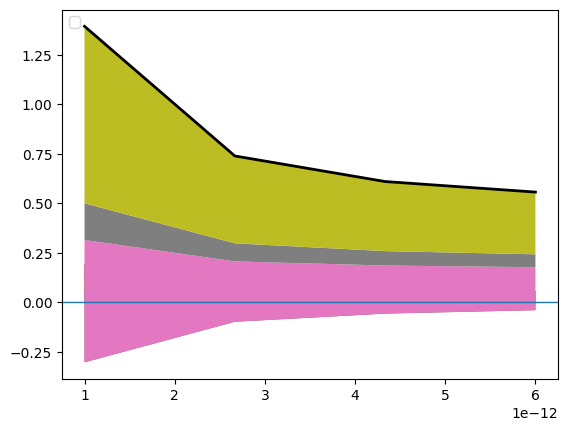

In [ ]:
import pandas as pd

df = pd.read_csv("test.csv")

cols = [
    "fs.costing.LCOW_component_direct_capex['fs.pump']",
    "fs.costing.LCOW_component_direct_capex['fs.RO']",
    "fs.costing.LCOW_component_direct_capex['fs.erd']",
    "fs.costing.LCOW_component_indirect_capex['fs.pump']",
    "fs.costing.LCOW_component_indirect_capex['fs.RO']",
    "fs.costing.LCOW_component_indirect_capex['fs.erd']",
    "fs.costing.LCOW_component_fixed_opex['fs.pump']",
    "fs.costing.LCOW_component_fixed_opex['fs.RO']",
    "fs.costing.LCOW_component_fixed_opex['fs.erd']",
    "fs.costing.LCOW_component_variable_opex['fs.pump']",
    "fs.costing.LCOW_component_variable_opex['fs.RO']",
    "fs.costing.LCOW_component_variable_opex['fs.erd']",
]
# for c in df.columns:
#     if "LCOW" in c:
#         print(f'"{c}",')
x = df["# A_comp"]
# for i, row in df.iterrows():
#     total = 0
#     print()
#     for c in cols:
#         print(f"Row {i} {c}: {row[c]}")
#         total += row[c]
#     print(f"Row {i} total LCOW: {total}, {row['fs.costing.LCOW']}")
stacked_cols = list()
units = ["fs.RO", "fs.erd", "fs.pump"]
for u in units:
    stacked_cols.append(
        df[f"fs.costing.LCOW_component_direct_capex['{u}']"]
        + df[f"fs.costing.LCOW_component_indirect_capex['{u}']"]
    )
    # stacked_cols.append(df[f"fs.costing.LCOW_component_indirect_capex['{u}']"])
    stacked_cols.append(df[f"fs.costing.LCOW_component_fixed_opex['{u}']"])
    stacked_cols.append(df[f"fs.costing.LCOW_component_variable_opex['{u}']"])
# for c in cols:
# stacked_cols.append(df[c])
# stacked_cols.append(df["fs.costing.LCOW_component_direct_capex['fs.pump']"])
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.stackplot(
    x,
    stacked_cols,
    colors=["blue", "green", "orange"],
    labels=["Capex", "Fixed Opex", "Variable Opex"],
)
ax.stackplot(
    x,
    stacked_cols,
)
ax.legend(loc="upper left")
ax.plot(x, df["fs.costing.LCOW"], color="black", label="Total LCOW", linewidth=2)
ax.axhline(0, linewidth=1)

In [44]:
for x in stacked_cols:
    print()
    print(x)


0    0.052491
1    0.025902
2    0.020629
3    0.018450
dtype: float64

0    0.068239
1    0.033673
2    0.026818
3    0.023985
Name: fs.costing.LCOW_component_fixed_opex['fs.RO'], dtype: float64

0    0.0
1    0.0
2    0.0
3    0.0
Name: fs.costing.LCOW_component_variable_opex['fs.RO'], dtype: float64

0    0.054002
1    0.019865
2    0.013097
3    0.010301
dtype: float64

0    0.016201
1    0.005960
2    0.003929
3    0.003090
Name: fs.costing.LCOW_component_fixed_opex['fs.erd'], dtype: float64

0   -0.494966
1   -0.184721
2   -0.122528
3   -0.096670
Name: fs.costing.LCOW_component_variable_opex['fs.erd'], dtype: float64

0    0.617502
1    0.304713
2    0.242683
3    0.217043
dtype: float64

0    0.185251
1    0.091414
2    0.072805
3    0.065113
Name: fs.costing.LCOW_component_fixed_opex['fs.pump'], dtype: float64

0    0.893660
1    0.440986
2    0.351215
3    0.314108
Name: fs.costing.LCOW_component_variable_opex['fs.pump'], dtype: float64


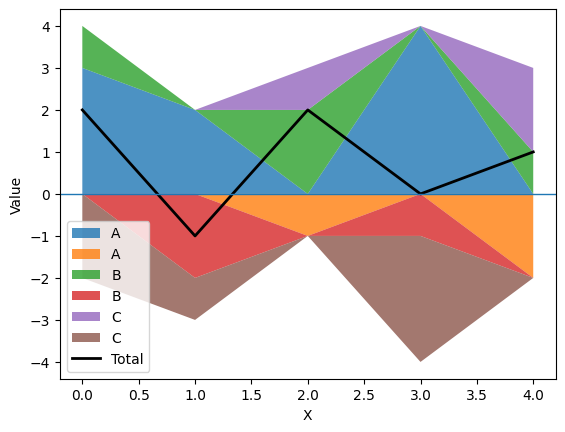

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(5)

# Example data
a = np.array([3, 2, -1, 4, -2])
b = np.array([1, -2, 2, -1, 1])
c = np.array([-2, -1, 1, -3, 2])
total = a + b + c

data = [a, b, c]
labels = ["A", "B", "C"]

# Initialize cumulative sums
pos_cum = np.zeros_like(x, dtype=float)
neg_cum = np.zeros_like(x, dtype=float)

fig, ax = plt.subplots()

for y, label in zip(data, labels):
    y_pos = np.clip(y, 0, None)
    y_neg = np.clip(y, None, 0)

    ax.fill_between(
        x, pos_cum, pos_cum + y_pos, label=label if np.any(y_pos) else None, alpha=0.8
    )
    ax.fill_between(
        x, neg_cum, neg_cum + y_neg, label=label if np.any(y_neg) else None, alpha=0.8
    )

    pos_cum += y_pos
    neg_cum += y_neg
ax.plot(x, total, color="black", label="Total", linewidth=2)
ax.axhline(0, linewidth=1)
ax.set_xlabel("X")
ax.set_ylabel("Value")
ax.legend()

plt.show()

In [21]:
stacked_cols

[0    0.308751
 1    0.152357
 2    0.121342
 3    0.108522
 Name: fs.costing.LCOW_component_direct_capex['fs.pump'], dtype: float64,
 0    0.026246
 1    0.012951
 2    0.010315
 3    0.009225
 Name: fs.costing.LCOW_component_direct_capex['fs.RO'], dtype: float64,
 0    0.027001
 1    0.009933
 2    0.006549
 3    0.005150
 Name: fs.costing.LCOW_component_direct_capex['fs.erd'], dtype: float64,
 0    0.308751
 1    0.152357
 2    0.121342
 3    0.108522
 Name: fs.costing.LCOW_component_indirect_capex['fs.pump'], dtype: float64,
 0    0.026246
 1    0.012951
 2    0.010315
 3    0.009225
 Name: fs.costing.LCOW_component_indirect_capex['fs.RO'], dtype: float64,
 0    0.027001
 1    0.009933
 2    0.006549
 3    0.005150
 Name: fs.costing.LCOW_component_indirect_capex['fs.erd'], dtype: float64,
 0    0.185251
 1    0.091414
 2    0.072805
 3    0.065113
 Name: fs.costing.LCOW_component_fixed_opex['fs.pump'], dtype: float64,
 0    0.068239
 1    0.033673
 2    0.026818
 3    0.023985
 Nam

In [18]:
x

0    1.000000e-12
1    2.666667e-12
2    4.333333e-12
3    6.000000e-12
Name: # A_comp, dtype: float64

In [15]:
df

,# A_comp,fs.costing.total_investment_factor,fs.costing.maintenance_labor_chemical_factor,fs.costing.utilization_factor,fs.costing.electricity_cost,fs.costing.electrical_carbon_intensity,fs.costing.plant_lifetime,fs.costing.wacc,fs.costing.capital_recovery_factor,fs.costing.TPEC,...,fs.costing.LCOW_aggregate_variable_opex[EnergyRecoveryDevice],fs.costing.LCOW_aggregate_variable_opex[electricity],fs.costing.SEC,fs.costing.SEC_component['fs.pump'],fs.costing.SEC_component['fs.erd'],fs.costing.high_pressure_pump.cost,fs.costing.reverse_osmosis.factor_membrane_replacement,fs.costing.reverse_osmosis.membrane_cost,fs.costing.reverse_osmosis.high_pressure_membrane_cost,fs.costing.energy_recovery_device.pressure_exchanger_cost
0,1.000000e-12,1.0,0.03,0.9,0.07,0.475,30.0,0.093073,0.1,4.121212,...,-0.494966,0.398694,5.761546,12.914320,-7.152772,1.908,0.2,30.0,75.0,535.0
1,2.666667e-12,1.0,0.03,0.9,0.07,0.475,30.0,0.093073,0.1,4.121212,...,-0.184721,0.256265,3.703299,6.372714,-2.669415,1.908,0.2,30.0,75.0,535.0
2,4.333333e-12,1.0,0.03,0.9,0.07,0.475,30.0,0.093073,0.1,4.121212,...,-0.122528,0.228687,3.304764,5.075426,-1.770662,1.908,0.2,30.0,75.0,535.0
3,6.000000e-12,1.0,0.03,0.9,0.07,0.475,30.0,0.093073,0.1,4.121212,...,-0.096670,0.217439,3.142217,4.539194,-1.396977,1.908,0.2,30.0,75.0,535.0


In [ ]:
# Make the necessary imports
from pprint import pprint
from IPython import get_ipython
from watertap.core.solvers import get_solver
from watertap.flowsheets.RO_with_energy_recovery.RO_with_energy_recovery import (
    optimize,
)
from watertap.flowsheets.RO_with_energy_recovery.monte_carlo_sampling_RO_ERD import (
    build_model,
    build_outputs,
)
from parameter_sweep import (
    LinearSample,
    ParameterSweep,
)
from week5.RO_with_ERD import param_sweep


def build_sweep_params(m, num_samples=1, scenario="A_comp_vs_LCOW"):
    sweep_params = {}

    # A_comp: Membrane water permeability coefficient
    # B_comp: Membrane salt permeability coefficient
    # NaCl_Loading: Feed water salinity
    # LCOW: Levelized cost of water

    if scenario == "A_comp_vs_LCOW":
        sweep_params["A_comp"] = LinearSample(
            m.fs.RO.A_comp, 1.0e-12, 1e-11, num_samples
        )
    elif scenario == "A_comp_vs_B_comp_vs_LCOW":
        sweep_params["A_comp"] = LinearSample(
            m.fs.RO.A_comp, 1.0e-12, 1e-11, num_samples
        )
        sweep_params["B_comp"] = LinearSample(
            m.fs.RO.B_comp, 8.0e-8, 1.0e-8, num_samples
        )
    elif scenario == "WR_vs_NaCL_loading_vs_LCOW":
        sweep_params["recovery"] = LinearSample(
            m.fs.RO.recovery_mass_phase_comp[0, "Liq", "H2O"], 0.1, 0.65, num_samples
        )
        sweep_params["NaCl_loading"] = LinearSample(
            m.fs.feed.properties[0].flow_mass_phase_comp["Liq", "NaCl"],
            0.01,
            0.05,
            num_samples,
        )
    else:
        raise NotImplementedError

    return sweep_params

In [3]:
def create_parameter_sweep_object(num_samples, num_procs):

    solver = get_solver()
    kwargs_dict = {
        # Arguments being used in the demo
        "h5_results_file_name": "academy_demo.h5",  # Resulting output file name
        "build_model": param_sweep,  # Function that builds the flowsheet model
        "build_model_kwargs": dict(
            # read_model_defauls_from_file=False,
            # defaults_fname="default_configuration.yaml",
        ),
        "build_sweep_params": build_sweep_params,  # Function for building sweep param dictionary
        "build_sweep_params_kwargs": dict(
            num_samples=num_samples, scenario="A_comp_vs_B_comp_vs_LCOW"
        ),
        "build_outputs": build_outputs,  # Function the builds outputs to save
        "build_outputs_kwargs": {},
        "optimize_function": optimize,  # Optimize flow sheet function
        "optimize_kwargs": {"solver": solver, "check_termination": False},
        "initialize_function": None,
        "initialize_kwargs": {},
        "parallel_back_end": "MultiProcessing",  # ConcurrentFutures, MPI, Ray available
        "number_of_subprocesses": num_procs,
        # Additional useful keyword arguments
        "csv_results_file_name": None,  # For storing results as CSV
        "h5_parent_group_name": None,  # Useful for loop tool
        "update_sweep_params_before_init": False,
        "initialize_before_sweep": False,
        "reinitialize_function": None,
        "reinitialize_kwargs": {},
        "reinitialize_before_sweep": False,
        "probe_function": None,
        # Post-processing arguments
        "interpolate_nan_outputs": False,
        # Advanced Users
        "debugging_data_dir": None,
        "log_model_states": False,
        "custom_do_param_sweep": None,  # Advanced users only!
        "custom_do_param_sweep_kwargs": {},
        # GUI-related
        "publish_progress": False,  # Compatibility with WaterTAP GUI
        "publish_address": "http://localhost:8888",
    }
    ps = ParameterSweep(**kwargs_dict)
    return ps, kwargs_dict

In [4]:
num_samples = 4
num_procs = 4
ps, kwargs_dict = create_parameter_sweep_object(num_samples, num_procs)

In [5]:
results_array, results_dict = ps.parameter_sweep(
    kwargs_dict["build_model"],
    kwargs_dict["build_sweep_params"],
    build_outputs=kwargs_dict["build_outputs"],
    build_outputs_kwargs=kwargs_dict["build_outputs_kwargs"],
    num_samples=num_samples,
    seed=None,
    build_model_kwargs=kwargs_dict["build_model_kwargs"],
    build_sweep_params_kwargs=kwargs_dict["build_sweep_params_kwargs"],
)

dof = 0
2026-01-05 14:15:10 [WARNING] idaes.core.base.costing_base: flow_expr is an expression with a lower bound of less than zero. Costing requires that all flows have a lower bound equal to or greater than zero to avoid negative costs.
2026-01-05 14:15:11 [INFO] idaes.init.fs.filtration: Initialization Step 1a Complete.
2026-01-05 14:15:11 [INFO] idaes.init.fs.filtration: Initialization Step 1b Complete.
2026-01-05 14:15:11 [INFO] idaes.init.fs.filtration: Initialization Step 1c Complete.
2026-01-05 14:15:11 [INFO] idaes.init.fs.filtration: Initialization Step 2 optimal - Optimal Solution Found.
2026-01-05 14:15:11 [INFO] idaes.init.fs.filtration: Initialization Complete: optimal - Optimal Solution Found
2026-01-05 14:15:11 [INFO] idaes.init.fs.translator.properties_out: fs.translator.properties_out State Released.
2026-01-05 14:15:11 [INFO] idaes.init.fs.translator: Initialization Complete: optimal - Optimal Solution Found
2026-01-05 14:15:11 [INFO] idaes.init.fs.pump.control_volum

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/ksitterl/opt/anaconda3/envs/watertap-academy/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
Traceback (most recent call last):
  File "/Users/ksitterl/opt/anaconda3/envs/watertap-academy/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
  File "<string>", line 1, in <module>
  File "/Users/ksitterl/opt/anaconda3/envs/watertap-academy/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/ksitterl/opt/anaconda3/envs/watertap-academy/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)    
exitcode = _main(fd, parent_sentinel)
    exitcode = _main(fd, parent_sentinel)
    exitcode = _main(fd, parent_sentinel)
                                

KeyboardInterrupt: 

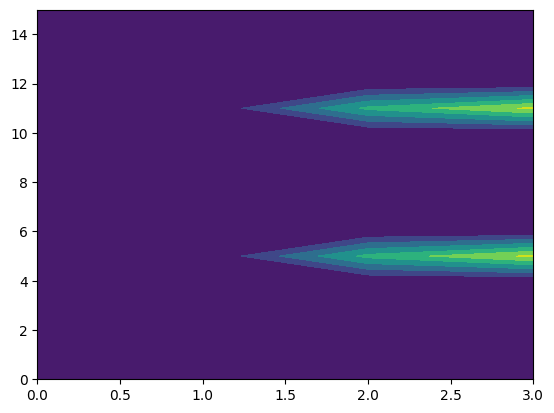

In [10]:
import numpy as np

x = np.array(
    [
        [1.00000000e-12, 8.00000000e-08, np.nan, np.nan],
        [1.00000000e-12, 5.66666667e-08, np.nan, np.nan],
        [1.00000000e-12, 3.33333333e-08, np.nan, np.nan],
        [1.00000000e-12, 1.00000000e-08, np.nan, np.nan],
        [4.00000000e-12, 8.00000000e-08, np.nan, np.nan],
        [4.00000000e-12, 5.66666667e-08, 3.44298662e00, 4.95788441e00],
        [4.00000000e-12, 3.33333333e-08, np.nan, np.nan],
        [4.00000000e-12, 1.00000000e-08, np.nan, np.nan],
        [7.00000000e-12, 8.00000000e-08, np.nan, np.nan],
        [7.00000000e-12, 5.66666667e-08, np.nan, np.nan],
        [7.00000000e-12, 3.33333333e-08, np.nan, np.nan],
        [7.00000000e-12, 1.00000000e-08, 3.38757637e00, 4.95405043e00],
        [1.00000000e-11, 8.00000000e-08, np.nan, np.nan],
        [1.00000000e-11, 5.66666667e-08, np.nan, np.nan],
        [1.00000000e-11, 3.33333333e-08, np.nan, np.nan],
        [1.00000000e-11, 1.00000000e-08, np.nan, np.nan],
    ]
)
x = np.nan_to_num(x, nan=0.0)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# ax.contourf(x[:,0].reshape(4,4), x[:,1].reshape(4,4), x[:,3].reshape(4,4))
ax.contourf(x)

In [ ]:
pprint(results_dict)

In [ ]:
pprint(results_array)

## Plotting Results

The resulting H5 files can then be processed to generate plots, e.g., 2D scatter plots, map plots, etc.

<table><tr>
    <td> <img src="assets_parameter_sweep_demo/scatter_LCOW_vs_Acomp.jpg" alt="LCOW vs water permeability" width="100%"/> </td>
    <td> <img src="assets_parameter_sweep_demo/maps_LCOW_recovery_NaCl_loading.jpg" alt="LCOW vs water recovery and NaCL concentration" width="100%"/> </td>
</tr></table>


# Advanced Usage and Features

## Types of Parameter Sweeps

* In its current form, a user can run 3 types of parameter sweeps
    - Simple parameter sweep
    - **Recursive parameter sweep**
    - Differential parameter sweep
* Samples for the parameter sweep can be generated from a probability distribution or an *n*-dimensional euclidean space where *n* is the number of parameters in the sweep. Latin hypercube sampling is also enabled.

### Recursive Parameter Sweep


<div>
    <img src="assets_parameter_sweep_demo/Recursive_Parameter_Sweep_flowchart.png" alt="RecursiveParameterSweep" width="100%" align="center"/>
</div>

*Run the simple parameter sweep in recursion if some runs fail to ensure that a user-specified number of sample results are generated. This involves resampling the input parameter space to compensate for the failed runs.*

In [ ]:
num_samples = 20
num_procs = 2
rps, rps_kwargs_dict = create_recursive_parameter_sweep_object(num_samples, num_procs)
rps_results_array, rps_results_dict = rps.parameter_sweep(
    rps_kwargs_dict["build_model"],
    rps_kwargs_dict["build_sweep_params"],
    build_outputs=rps_kwargs_dict["build_outputs"],
    build_outputs_kwargs=rps_kwargs_dict["build_outputs_kwargs"],
    num_samples=num_samples,
    seed=None,
    build_model_kwargs=rps_kwargs_dict["build_model_kwargs"],
    build_sweep_params_kwargs=rps_kwargs_dict["build_sweep_params_kwargs"],
)

In [ ]:
pprint(rps_results_array)

In [ ]:
pprint(rps_results_dict)

## Types of Parameter Sweeps

* In its current form, a user can run 3 types of parameter sweeps
    - Simple parameter sweep
    - Recursive parameter sweep
    - **Differential parameter sweep**
* Samples for the parameter sweep can be generated from a probability distribution or an *n*-dimensional euclidean space where *n* is the number of parameters in the sweep. Latin hypercube sampling is also enabled.

### Differential Parameter Sweep

<div>
    <img src="assets_parameter_sweep_demo/Differential_Parameter_Sweep_Flowchart.png" alt="DifferentialParameterSweep"  width="90%" align="center"/>
</div>

* Gather sensitivity data when the input parameter space is more than one dimensional. 
* It comprises two types of sweeps, an outer "nominal" sweep and an inner "differential" sweep. 
* The nominal sweep is a simple parameter sweep over the sampled space. 
* The differential sweep is a simple parameter sweep that occurs at every nominal value, where one of the sweep parameters is perturbed keeping the others fixed to their nominal values.

In [ ]:
num_samples = 2
num_procs = 1

model, dps, dkwargs_dict = create_differential_parameter_sweep_object(
    num_samples, num_procs
)
dps_results_array, dps_results_dict = dps.parameter_sweep(
    dkwargs_dict["build_model"],
    dkwargs_dict["build_sweep_params"],
    build_outputs=dkwargs_dict["build_outputs"],
    build_outputs_kwargs=dkwargs_dict["build_outputs_kwargs"],
    num_samples=num_samples,
    seed=None,
    build_model_kwargs=dkwargs_dict["build_model_kwargs"],
    build_sweep_params_kwargs=dkwargs_dict["build_sweep_params_kwargs"],
)

In [ ]:
pprint(dps_results_array)

In [ ]:
pprint(dps_results_dict)

## Loop Tool

* The parameter sweep tool can be invoked from a looping tool, also within WaterTAP, that allows a user to iteratively run different design configurations, 
    - Different build options
    - Different flowchart initialization options
    - Different solve constraints
    - e.g., different pressure exchanger types in RO
* YAML based initial setup.
* The loop tool uses HDF5 format to systematically store outputs from the various parameter sweeps.
* The loop tool, in combination with differential parameter sweep, can be used to conduct high-impact stochastic value of innovation analysis (see [Dudchenko et al.](https://doi.org/10.1073/pnas.2022196118)). 

## Parallel Manager

The parallel manager allows the end-user to select which parallel backend to run their parameter sweep with. Currently supported parallel backends include:

* Message Passing Interface (MPI)
* Python multiprocessing
* Python concurrent futures
* Ray Core
* Serial execution

The parallel manager provides a unified API to use the parallel backends.

### Motivation

* Most people will be running parameter sweep on a shared memory system and are familiar with python multiprocessing and concurrent futures.
    - Use concurrent futures when pyomo model initialization and reinitialization is trivial
    - Use python multiprocessing when initialization/reinitialization is computationally intensive.
* MPI enables distributed parallel computing on an HPC
* Ray is an MPI alternative for distributed parallel computing that has a simpler API.

Multiple parallel backends necessitates an abstraction layer such that the onus of supporting these parallel paradigms does not fall on the average WaterTAP developer. *Parallel Manager is that abstraction layer.*

### Currently Supported Parallel Features

* Gather, all gather - Gather value on a specific or all process(es)
* Scatter - Scatter values from one process to all other processess
* Broadcast - Broadcast a data structure to all processes
* All reduce - Reduce values and distribute to all processes

### Benchmarking Results

Next we look at benchmarking results of running the parameter sweep tool

#### Python Concurrent Futures

<table><tr>
    <td> 
        <img src="assets_parameter_sweep_demo/RO-ERD_Mac_2500_time.png" alt="Strong Scaling for RO" width="100%"/>
        <center><em>Compute Time</em></center>
    </td>
    <td> 
        <img src="assets_parameter_sweep_demo/RO-ERD_Mac_2500_speedup.png" alt="RO-ERD Speedup" width="100%"/>
        <center><em>Speed up</em></center>
    </td>
</tr></table>
<center><em>Strong Scaling Results for RO with Energy Recovery Device on a Mac</em></center>

#### MPI on NREL's Eagle HPC

<table><tr>
    <td> 
        <img src="assets_parameter_sweep_demo/RO-ERD_Eagle_Strong_Scaling_100K.png" alt="Strong Scaling for RO" width="100%"/>
        <center><em>RO with Energy Recovery Device</em></center>
    </td>
    <td> 
        <img src="assets_parameter_sweep_demo/LSRRO_Eagle_strong_10K.png" alt="LSRRO Strong Scaling" width="100%"/>
        <center><em>LSRRO</em></center>
    </td>
</tr></table>
<center><em>Strong Scaling Results</em></center>

# Future Work

* Closer integration with WaterTAP GUI.
* Integration with plotting tools

# Useful Documentation Links

* [How to explore a model with parameter sweep](https://watertap.readthedocs.io/en/latest/how_to_guides/how_to_use_parameter_sweep.html#how-to-explore-a-model-with-parameter-sweep)
* [Monte Carlo testing with the Parameter Sweep](https://watertap.readthedocs.io/en/latest/how_to_guides/how_to_use_parameter_sweep_monte_carlo.html#monte-carlo-testing-with-the-parameter-sweep)
* [How to Run Differential Parameter Sweep](https://watertap.readthedocs.io/en/latest/how_to_guides/how_to_run_differential_parameter_sweep.html#how-to-run-differential-parameter-sweep)
* [How to use loopTool to explore flowsheets](https://watertap.readthedocs.io/en/latest/how_to_guides/how_to_use_loopTool_to_explore_flowsheets.html#how-to-use-looptool-to-explore-flowsheets)
* [MPI Parallel Usage](https://watertap.readthedocs.io/en/latest/technical_reference/tools/parameter_sweep.html#parallel-usage)

# Appendix

## Example Slurm Job submission script on NREL's Kestrel

### Slurm Batch File

```bash
#!/bin/bash 
#SBATCH --nodes=1  # Run the tasks on the same node
#SBATCH --ntasks-per-node=104 # Tasks per node to be run
#SBATCH --time=1:00:00   # Required, estimate 5 minutes
#SBATCH --account=hpcapps # Required
#SBATCH --partition=debug
#SBATCH --mail-user=kinshuk.panda@nrel.gov
#SBATCH --mail-type=BEGIN
#SBATCH --mail-type=END
#SBATCH --mail-type=FAIL
#SBATCH --mail-type=REQUEUE

cd /home/kpanda/NAWI/watertap/tutorials/parameter_sweep_demo
module purge
module load craype-x86-spr
module load gcc/13.1.0 anaconda3/2022.05 netlib-lapack/3.11.0-gcc
conda activate /projects/hpcapps/kpanda/conda-envs/watertap

mkdir -p outputs
N_SAMPLES=5000
NPROCS=100

python parameter_sweep_demo_script.py $N_SAMPLES $NPROCS > outputs/fout_mp_${N_SAMPLES}_${NPROCS} 2> outputs/errout__mp_${N_SAMPLES}_${NPROCS}
```


### Parameter Sweep Script

In [ ]:
from IPython.display import Code

Code(
    filename="assets_parameter_sweep_demo/parameter_sweep_demo_script.py",
    language="python",
)